## 비트코인 가격 예측 2023년 1월

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/leejieun/workspace/kaggle-notebooks/datasets/akashpawar10/bitcoin-price-prediction/BTC-USD (1).csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/25/2023,22639.26758,23722.09961,22406.07617,23117.85938,23117.85938,3.068537e+10
1,1/26/2023,23108.95508,23237.07813,22911.37305,23032.77734,23032.77734,2.635784e+10
2,1/27/2023,23030.71680,23417.72070,22654.59375,23078.72852,23078.72852,2.538334e+10
3,1/28/2023,23079.96484,23165.89648,22908.84570,23031.08984,23031.08984,1.471293e+10
4,1/29/2023,23031.44922,23919.89063,22985.07031,23774.56641,23774.56641,2.742369e+10


In [4]:
df.shape

(366, 7)

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month']= df['Date'].dt.month
import calendar
df['Month_Name'] = df['Month'].map(lambda x: calendar.month_name[x])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        366 non-null    datetime64[ns]
 1   Open        365 non-null    float64       
 2   High        365 non-null    float64       
 3   Low         365 non-null    float64       
 4   Close       365 non-null    float64       
 5   Adj Close   365 non-null    float64       
 6   Volume      365 non-null    float64       
 7   Month       366 non-null    int32         
 8   Month_Name  366 non-null    object        
dtypes: datetime64[ns](1), float64(6), int32(1), object(1)
memory usage: 24.4+ KB


In [7]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
count,366,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02,366.000000
mean,2023-07-26 11:59:59.999999744,30373.242589,30879.805458,29913.332026,30421.045452,30421.045452,1.870732e+10,6.510929
min,2023-01-25 00:00:00,20187.876950,20370.595700,19628.253910,20187.244140,20187.244140,5.331173e+09,1.000000
25%,2023-04-26 06:00:00,26431.519530,26774.623050,26090.712890,26476.207030,26476.207030,1.215184e+10,4.000000
50%,2023-07-26 12:00:00,28324.111330,28802.457030,27843.763670,28333.050780,28333.050780,1.639750e+10,7.000000
75%,2023-10-25 18:00:00,33907.722660,34399.390630,33416.886720,33909.800780,33909.800780,2.317100e+10,9.750000
max,2024-01-25 00:00:00,46987.640630,48969.371090,45678.644530,46970.503910,46970.503910,5.462223e+10,12.000000
std,NaN,6307.014778,6448.151265,6144.163928,6312.964576,6312.964576,9.094555e+09,3.459930


In [8]:
df.isna().sum()*100/df.shape[0]

Date          0.000000
Open          0.273224
High          0.273224
Low           0.273224
Close         0.273224
Adj Close     0.273224
Volume        0.273224
Month         0.000000
Month_Name    0.000000
dtype: float64

In [9]:
df.dropna(inplace=True)

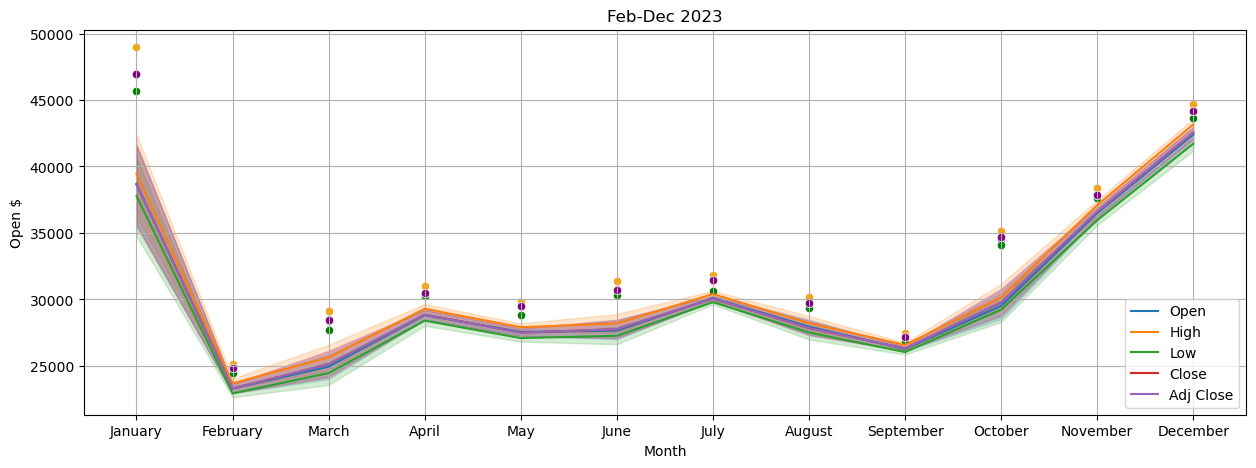

In [10]:
monthly_max_values = df.groupby('Month_Name').agg({'Open': 'max', 'High': 'max', 'Low': 'max', 'Close': 'max', 'Adj Close': 'max'}).reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Month_Name',y='Open',label='Open')
sns.lineplot(data=df,x='Month_Name',y='High',label='High')
sns.lineplot(data=df,x='Month_Name',y='Low',label='Low')
sns.lineplot(data=df,x='Month_Name',y='Close',label='Close')
sns.lineplot(data=df,x='Month_Name',y='Adj Close',label='Adj Close')
sns.scatterplot(data=monthly_max_values, x='Month_Name', y='Open', marker='o', color='blue')
sns.scatterplot(data=monthly_max_values, x='Month_Name', y='High', marker='o', color='orange')
sns.scatterplot(data=monthly_max_values, x='Month_Name', y='Low', marker='o', color='green')
sns.scatterplot(data=monthly_max_values, x='Month_Name', y='Close', marker='o', color='red')
sns.scatterplot(data=monthly_max_values, x='Month_Name', y='Adj Close', marker='o', color='purple')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Open $')
plt.title('Feb-Dec 2023')
plt.show()

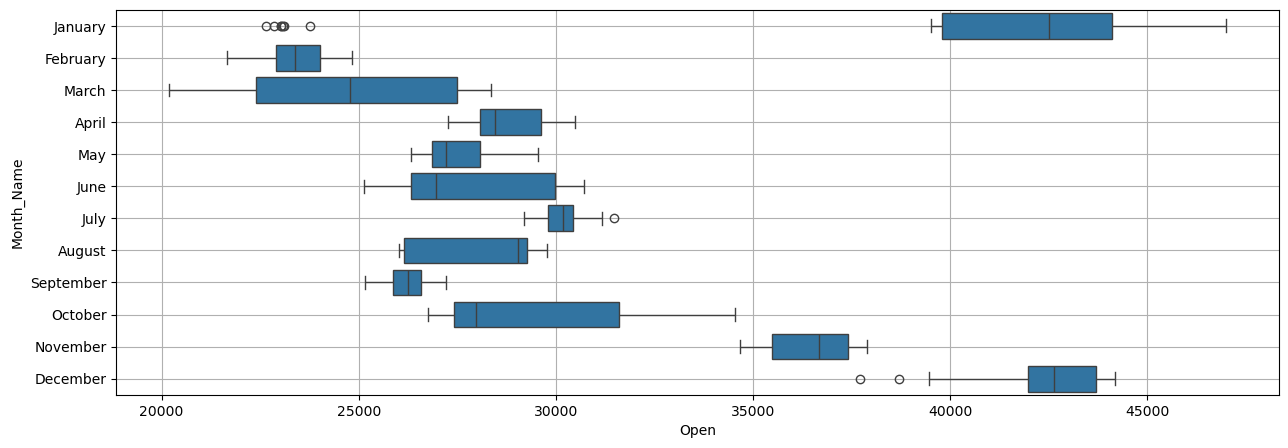

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='Month_Name', x='Open')
plt.grid()
plt.show()

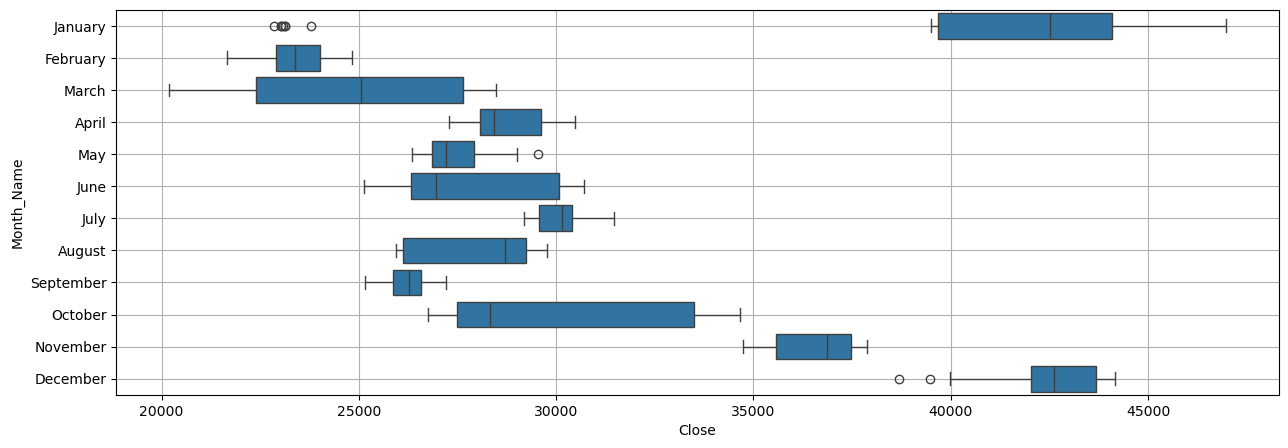

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='Month_Name', x='Close')
plt.grid()
plt.show()